In [1]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys

import matplotlib.pyplot as plt
import os 
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [2]:
def cartoonify(ImagePath):
    #read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')
    

In [3]:
ImagePath=easygui.fileopenbox(default='Desktop\catoon')

In [4]:
originalmage = cv2.imread(ImagePath)
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
#print(image)  # image is stored in form of numbers
# confirm that image is chosen
if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
ReSized1 = cv2.resize(originalmage, (960, 540))
#plt.imshow(ReSized1, cmap='gray')

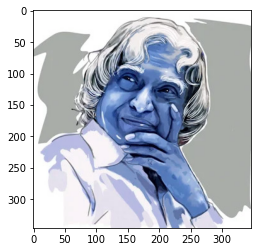

In [5]:
file = ImagePath
image = cv2.imread(file)
plt.imshow(image)


In [6]:
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
#plt.imshow(ReSized2, cmap='gray')

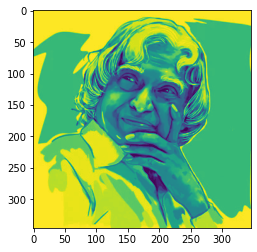

In [7]:
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
#plt.imshow(ReSized2, cmap='gray')
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
#plt.imshow(ReSized3, cmap='gray')
plt.imshow(grayScaleImage)

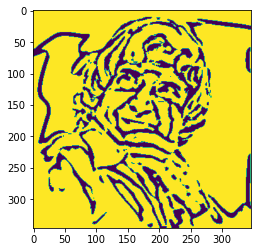

In [25]:
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 17, 10)
ReSized4 = cv2.resize(getEdge, (800, 740))
#plt.imshow(ReSized4, cmap='gray')
plt.imshow(getEdge)

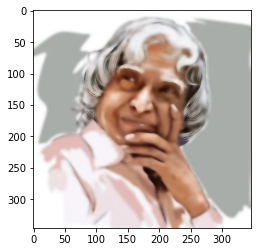

In [26]:
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
#plt.imshow(ReSized5, cmap='gray')
plt.imshow(colorImage)

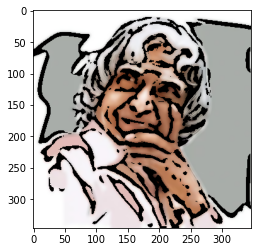

In [27]:
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (960, 540))
#plt.imshow(ReSized6, cmap='gray')
plt.imshow(cartoonImage)

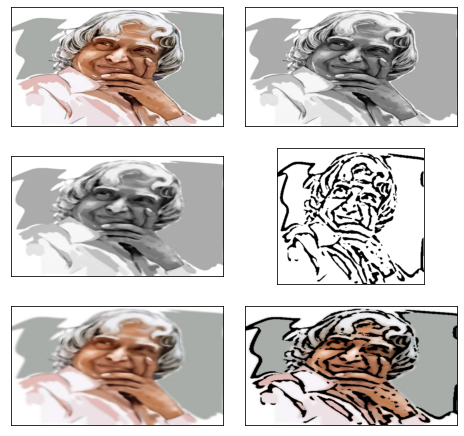

In [28]:
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')

plt.show()

In [29]:
def save2(ReSized6, ImagePath):
    #saving an image using imwrite()
    
    newName="cartoonified_Image2"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

In [30]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

Label(top, text= "This window will get closed after 4 seconds...",
font=('Helvetica 15 bold')).pack(pady=20)
top.after(4000,lambda:top.destroy())

'after#0'

In [31]:
upload =Button(top,text="Cartoonify an Image",command= "upload",padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)
save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, ReSized6),padx=30,pady=5)
save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
save1.pack(side=TOP,pady=50)

In [32]:
save2(ReSized4, ImagePath)

In [16]:
top.mainloop()